In [1]:
%matplotlib inline

import sys
sys.path.insert(0, "../code/")

In [2]:
from utils.plotting import plot

In [3]:
class NameSpace(object):
    def __init__(self, adict):
        self.__dict__.update(adict)

In [4]:
def get_exps(attack):
    exps = []
    for model, agg, bucketing, pp, pp_ratio, cl, cl_mult in zip(
        model_s, agg_s, bucketing_s, 
        partial_participation_s, partial_participation_ratio_s,
        clip_update_s, clip_mult_s):
        exp = {
            'attack': attack,
            'model': model,
            'agg': agg,
            'bucketing': bucketing,
            'run_id': run_id,
            'train_metric': train_metric,
            'metric': metric,
            'outputs_dir': outputs_dir,
            'compression': compression,
            'partial_participation': pp,
            'partial_participation_ratio': pp_ratio,
            'clip_update': cl,
            'clip_mult': cl_mult,
        }
        exp = NameSpace(exp)
        exps.append(exp)
    return exps

In [16]:
min_value = 0.48710015416145325  # 0.39699700474739075 for w8a

run_id = "a9a_full"
train_metric = True
metric = 'loss'
kind = 'train_loss'

outputs_dir = '../outputs'

model_s = ['marina']
agg_s = ['cm', 'cm', 'cm', 'cm', 'cm']
bucketing_s = [2, 2, 2, 2, 2]
partial_participation_s = [True, True, True, True, True]
partial_participation_ratio_s = [0.2, 0.2, 0.2, 0.2, 0.2]
# clip_update_s = [True, True, True, True]
clip_update_s = [True, True, True, True, False]

clip_mult_s = [0.1, 0.1, 1.0, 10., None]

attack = 'LF' # ['NA', 'BF', 'LF', 'ALIE', 'IPM', 'SHB']


compression = 'none'

# legend = [r'$\sf{Byz}$-$\sf{VR}$-$\sf{MARINA}$-$\sf{PP}$', r'$\sf{Byz}$-$\sf{VR}$-$\sf{MARINA}$', r'$\sf{BR}$-$\sf{SGD}$']
legend = [f"clip mult. = {cl_mult}" for cl_mult in clip_mult_s]

# legend = ['Partial (20% clients)', 'Full']


Best_lr: lr=0.01
Output value: 0.040650874376297 +- 0.03087902069091797


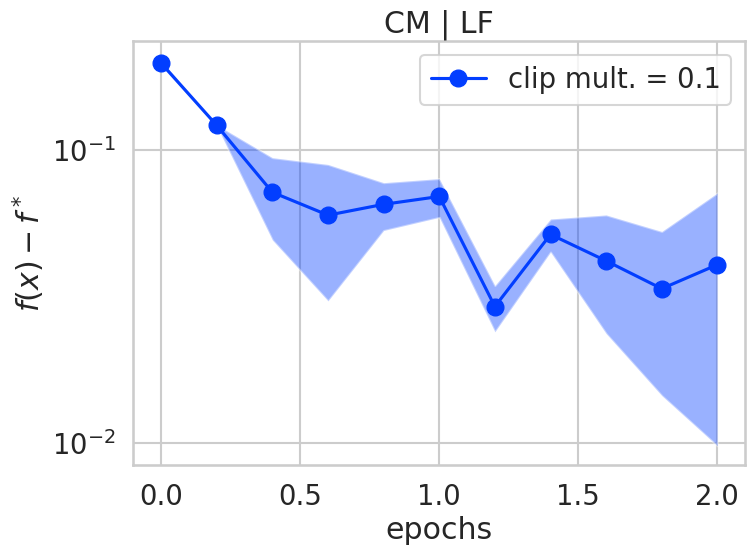

In [17]:
exps = get_exps(attack)

plot(
    exps, kind,
    log_scale=True, legend=legend,
    file=f'{run_id}_comp={compression}_agg={agg_s[0]}_attack_{attack}_clip_sensitivity',
    x_label='epochs', y_label=r'$f(x) - f^*$',
    min_value=min_value,
    title= f"{agg_s[0].upper()} | {attack}",
    # bottom=0.5*1e-7
)